<a href="https://colab.research.google.com/github/red1ithink/flow/blob/main/2d_decay/GeneratingVelocityField.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

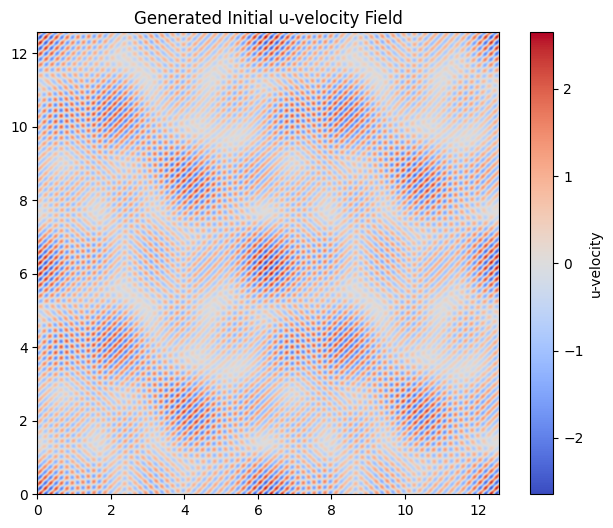

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 2048
L = 2 * 6.283
dx = L / N
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, N, endpoint=False)
X, Y = np.meshgrid(x, y)

k_min = 18
k_max = 22
num_modes = 10

u = np.zeros((N, N))
v = np.zeros((N, N))

for _ in range(num_modes):
    kx = np.random.randint(k_min, k_max + 1)
    ky = np.random.randint(k_min, k_max + 1)
    phase = np.random.uniform(0, 2 * np.pi)

    u += np.sin(kx * X + phase) * np.cos(ky * Y + phase)
    v += -np.cos(kx * X + phase) * np.sin(ky * Y + phase)

U_rms = np.sqrt(np.mean(u**2 + v**2))
u /= U_rms
v /= U_rms

plt.figure(figsize=(8, 6))
plt.imshow(u, cmap='coolwarm', origin='lower', extent=[0, L, 0, L])
plt.colorbar(label='u-velocity')
plt.title("Generated Initial u-velocity Field")
plt.show()

# OpenFOAM (ASCII format)
np.savetxt("U_initial.dat", np.c_[u.flatten(), v.flatten(), np.zeros_like(u.flatten())])

In [ ]:
import os

data = np.loadtxt("U_initial.dat")

header = """FoamFile
{{
    version     2.0;
    format      ascii;
    class       volVectorField;
    location    "0";
    object      U;
}}

dimensions      [0 1 -1 0 0 0 0];

internalField   nonuniform List<vector>
{}
(
""".format(len(data))

footer = """);

boundaryField
{
    top
    {
        type            cyclic;
    }
    bottom
    {
        type            cyclic;
    }
    right
    {
        type            cyclic;
    }
    left
    {
        type            cyclic;
    }

    frontAndBack
    {
        type            empty;
    }
}
"""

vector_data = "\n".join(["({} {} {})".format(*row) for row in data])

os.makedirs("0", exist_ok=True)

with open("0/U", "w") as f:
    f.write(header + vector_data + "\n" + footer)